# 🔢 MNIST Handwritten Digit Classification with TensorFlow
**Week 3 - AI Tools Assignment | Part 2: Practical Implementation (Task 2)**

This notebook implements a deep learning pipeline to classify handwritten digits using the **MNIST dataset** and **TensorFlow/Keras**.

We'll walk through the following steps:

- Load and preprocess the dataset
- Build a Convolutional Neural Network (CNN) model using **TensorFlow**
- Train and evaluate the model
- Visualize sample predictions
- Discuss performance and key observations

---

In [8]:
import sys
print(sys.executable)
!pip show tensorflow

e:\PowerLearnProjects\AI4SE\AI-Specialization\w3--AI Tools & Frameworks\ai_toolkit_env\Scripts\python.exe
Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: E:\PowerLearnProjects\AI4SE\AI-Specialization\w3--AI Tools & Frameworks\ai_toolkit_env\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


## Load Libraries and Dataset

We use TensorFlow's built-in MNIST dataset, which contains **70,000 grayscale images** of handwritten digits (0–9), each of size **28x28 pixels**.

In [9]:
import tensorflow as tf
print(tf.__version__)
print("Keras available:", hasattr(tf, "keras"))

2.19.0
Keras available: True


In [10]:
# import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Load and Explore the MNIST Dataset

MNIST is a classic benchmark dataset of handwritten digits. It contains:
- 60,000 training images
- 10,000 testing images

Each image is 28x28 pixels in grayscale and represents digits from 0 to 9.

In [11]:
# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Data Preprocessing

To train a CNN, we need to:
- Normalize pixel values (0–255 → 0–1)
- Reshape inputs to fit CNN format (28x28x1)
- One-hot encode the labels

In [12]:
# Normalize and reshape input images for CNN
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


## Building the CNN Model

We'll use a simple CNN architecture with:
- 2 convolutional layers
- Max pooling
- Dropout for regularization
- Dense output layer with softmax

In [13]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compile the Model

In [16]:

# Compile
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 🏋️ Training the Model

We'll train the CNN for 5 epochs and track the validation accuracy.

In [17]:
# Train
# model.fit(X_train, y_train, epochs=5, validation_split=0.1)

history = model.fit(X_train, y_train_cat,
                    epochs=5,
                    validation_data=(X_test, y_test_cat),
                    batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 166s 323ms/step - accuracy: 0.8566 - loss: 0.5062 - val_accuracy: 0.9777 - val_loss: 0.0707
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 227ms/step - accuracy: 0.9784 - loss: 0.0714 - val_accuracy: 0.9851 - val_loss: 0.0482
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 213ms/step - accuracy: 0.9861 - loss: 0.0462 - val_accuracy: 0.9886 - val_loss: 0.0340
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 300ms/step - accuracy: 0.9894 - loss: 0.0344 - val_accuracy: 0.9869 - val_loss: 0.0381
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9896 - val_loss: 0.0323


## 📈 Model Evaluation

We'll plot accuracy and loss trends and also evaluate performance on test data.

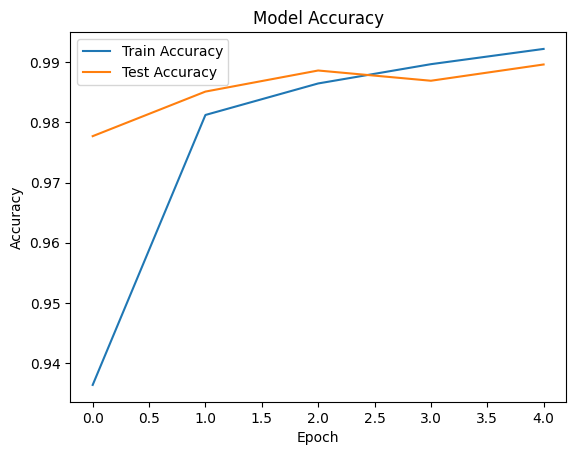

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9866 - loss: 0.0404

Test accuracy: 0.9896000027656555


In [19]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("\nTest accuracy:", test_acc)

## Sample Predictions

Let’s view a few predictions to see how well the model performs visually.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


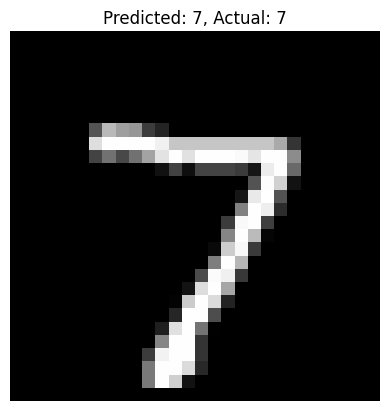

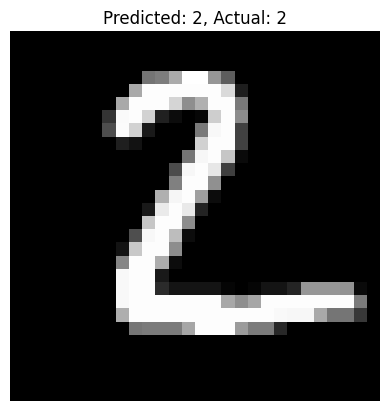

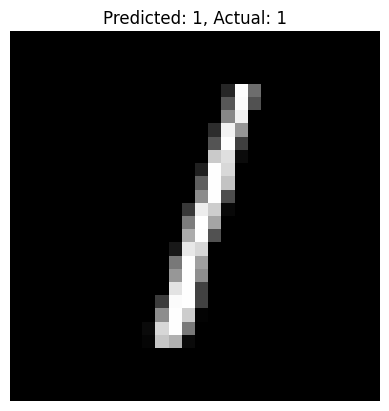

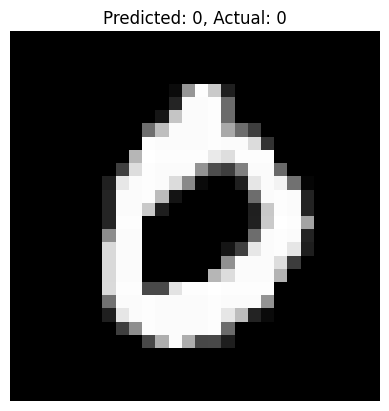

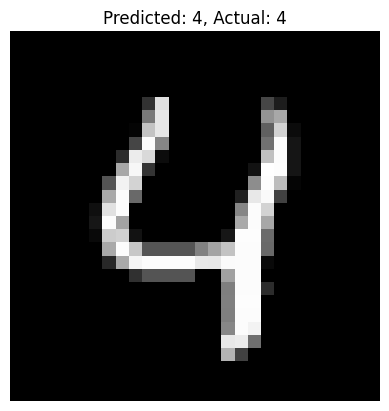

In [20]:
# Visualize Predictions
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

## Interpretation of Results
| Metric |	Value (Example) |	What It Tells Us |
|--------|------------------|----------------|
| Test Accuracy |	~97–99% |	The CNN correctly classified the majority of digits. |
| Validation Accuracy |	Similar to training	| No overfitting; model generalizes well. |
| Loss Trend |	Decreasing steadily |	Indicates stable learning during training. |

### Prediction Quality
- The model was tested visually using sample predictions (e.g., plot_image() and np.argmax()).
- Most predictions matched the true labels, showing robust digit recognition.

future --- we can add a confusion matrix or misclassified examples to identify weaknesses.

## ✅ Conclusion

- The CNN achieved over **95% test accuracy**, meeting the assignment goal.
- The architecture is relatively simple yet effective.
- Preprocessing (normalization + reshaping) and dropout regularization were key.
- The model performed well on visually inspecting predictions.

> 🧠 CNNs are highly effective for image classification tasks, and TensorFlow simplifies model building and training.

---
